In [2]:
import numpy as np
import pandas as pd
import re
import math
import pandas as pd
from matplotlib import pyplot as plt

In [37]:

srs = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Parent_Measures/Demographic_Questionnaire_Measures/SRS.csv')
srs = srs[['Identifiers', 'SRS,SRS_20', 'SRS,SRS_42', 'SRS,SRS_58', 'SRS,SRS_Total', 'SRS,SRS_Total_T']]

srs = srs.rename(columns={
    'SRS,SRS_20': 'SRS_20',
    'SRS,SRS_42': 'SRS_42',
    'SRS,SRS_58': 'SRS_58',
    'SRS,SRS_Total': 'SRS_Total',
    'SRS,SRS_Total_T': 'SRS_Total_T'
})

srs_pre = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Parent_Measures/Demographic_Questionnaire_Measures/SRS_Pre.csv')
srs_pre = srs_pre[['Identifiers', 'SRS_Pre,SRS_P_20', 'SRS_Pre,SRS_P_42', 'SRS_Pre,SRS_P_58', 'SRS_Pre,SRS_Total', 'SRS_Pre,SRS_Total_T']]

srs_pre = srs_pre.rename(columns={
    'SRS_Pre,SRS_P_20': 'SRS_20',
    'SRS_Pre,SRS_P_42': 'SRS_42',
    'SRS_Pre,SRS_P_58': 'SRS_58',
    'SRS_Pre,SRS_Total': 'SRS_Total',
    'SRS_Pre,SRS_Total_T': 'SRS_Total_T'
})

srs = pd.concat([srs, srs_pre])

In [25]:
scq = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Parent_Measures/Demographic_Questionnaire_Measures/Social_Communication_Questionnaire.csv')
scq = scq[['Identifiers', 'SCQ,SCQ_02', 'SCQ,SCQ_Total']]

scq = scq.rename(columns={
    'SCQ,SCQ_02': 'SCQ_02',
    'SCQ,SCQ_Total': 'SCQ_Total'
})

In [26]:
scq

,Identifiers,SCQ_02,SCQ_Total
0,NDARAT581NDH,0.0,5.0
1,NDARBF851NH6,0.0,12.0
2,NDARBM433VER,0.0,4.0
3,NDARCM811CV1,0.0,3.0
4,NDARCP292KPA,0.0,6.0
...,...,...,...
3737,NDARXN278KTH,1.0,18.0
3738,NDARYM832PX3,0.0,6.0
3739,NDARCJ198PGC,0.0,1.0
3740,NDARPL415XWH,0.0,4.0


In [26]:

dx = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Clinical_Measures/Clinical_Diagnosis_Demographics.csv')
dx = dx[['Identifiers', 'Age', 'Sex', 'Site', 'DX_01', 'DX_02', 'DX_03', 'DX_04', 'DX_05', 'DX_06', 'DX_07', 'DX_08', 'DX_09', 'DX_10']]


/tmp/ipykernel_16373/1566004162.py:3: DtypeWarning: Columns (137,152) have mixed types. Specify dtype option on import or set low_memory=False.
  dx = pd.read_csv('/nese/mit/group/sig/projects/hbn/phenotype/Clinical_Measures/Clinical_Diagnosis_Demographics.csv')


In [28]:
sub_list = dx.Identifiers.tolist()
#sub_list = [elem[:12] for elem in sub_list]

In [55]:
all_dx = []
for i,column in enumerate(dx):
    print(column)
    if i<=3:
        print('skipping')
        continue
    all_dx.append(dx[column].tolist())
all_dx = [item for sublist in all_dx for item in sublist]
all_dx = np.unique(np.array(all_dx))
all_dx = all_dx[0:-1]
all_dx = all_dx.tolist()
all_dx[0:10]

Identifiers
skipping
Age
skipping
Sex
skipping
Site
skipping
DX_01
DX_02
DX_03
DX_04
DX_05
DX_06
DX_07
DX_08
DX_09
DX_10


['ADHD-Combined Type',
 'ADHD-Hyperactive/Impulsive Type',
 'ADHD-Inattentive Type',
 'Acute Stress Disorder',
 'Adjustment Disorders',
 'Agoraphobia',
 'Alcohol Use Disorder',
 'Anorexia Nervosa-Binge Eating/Purging Type',
 'Anorexia Nervosa-Restricting Type',
 'Autism Spectrum Disorder']

In [57]:
#subject by dx array
dx_array = np.zeros( (dx.shape[0],len(all_dx) ))

#LOOP THROUGH columns
for i,column in enumerate(dx):
    print(column)
    if i<=3:
        print('skipping')
        continue
    for ii,d in enumerate(dx[column]):
        #print(i,ii,d)
        if not isinstance(d, str):
            if math.isnan(d):
                continue
        if not bool(re.match(d,' ')):
            dx_array[ii,all_dx.index(d)]=1

Identifiers
skipping
Age
skipping
Sex
skipping
Site
skipping
DX_01
DX_02
DX_03
DX_04
DX_05
DX_06
DX_07
DX_08
DX_09
DX_10


In [66]:
dx_array.shape

(4767, 110)

In [59]:
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy',all_dx)
np.save('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy',sub_list)
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy',dx_array)

In [61]:
dx_df = pd.DataFrame(dx_array)
dx_df.columns = all_dx
dx_df
dx_df.to_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')
#unpickled_df = pd.read_pickle("./dummy.pkl")

In [71]:
dx_final = dx[['Identifiers', 'Age', 'Sex', 'Site']]
df2 = pd.DataFrame(dx_array.tolist(), columns=all_dx)
dx_final = pd.concat([dx_final, df2], axis=1)

dx_final.to_csv('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.csv', index=False)


In [27]:
dx_final=pd.read_csv('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.csv')


In [34]:
dx_final

,Identifiers,Age,Sex,Site,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,...,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Feeding or Eating Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder
0,NDARAA075AMK,6.728040,female,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NDARAA112DMH,5.545744,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NDARAA117NEJ,7.475929,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NDARAA306NT2,21.216746,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NDARAA358BPN,11.853296,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,NDARZT957CWG,16.034565,male,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4763,NDARZU401RCU,17.663586,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4764,NDARZV458LDP,15.763175,female,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4765,NDARZX745YLZ,16.288501,male,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
merged_df = pd.merge(dx_final, srs, on='Identifiers', how='left')
merged_df = pd.merge(merged_df, scq, on='Identifiers', how='left')
merged_df['CSS'] = merged_df['SRS_20'] + merged_df['SRS_42'] + merged_df['SRS_58'] + 4 * merged_df['SCQ_02']
merged_df

,Identifiers,Age,Sex,Site,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,...,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder,SRS_20,SRS_42,SRS_58,SRS_Total,SRS_Total_T,SCQ_02,SCQ_Total,CSS
0,NDARAA075AMK,6.728040,female,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,39.0,0.0,1.0,0.0
1,NDARAA112DMH,5.545744,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.0,48.0,0.0,6.0,0.0
2,NDARAA117NEJ,7.475929,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,52.0,57.0,1.0,9.0,5.0
3,NDARAA306NT2,21.216746,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,122.0,89.0,0.0,20.0,4.0
4,NDARAA358BPN,11.853296,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,NDARZT957CWG,16.034565,male,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,3.0,125.0,86.0,0.0,26.0,6.0
4765,NDARZU401RCU,17.663586,female,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,81.0,72.0,0.0,9.0,2.0
4766,NDARZV458LDP,15.763175,female,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,44.0,NaN,NaN,NaN
4767,NDARZX745YLZ,16.288501,male,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,72.0,65.0,0.0,6.0,3.0


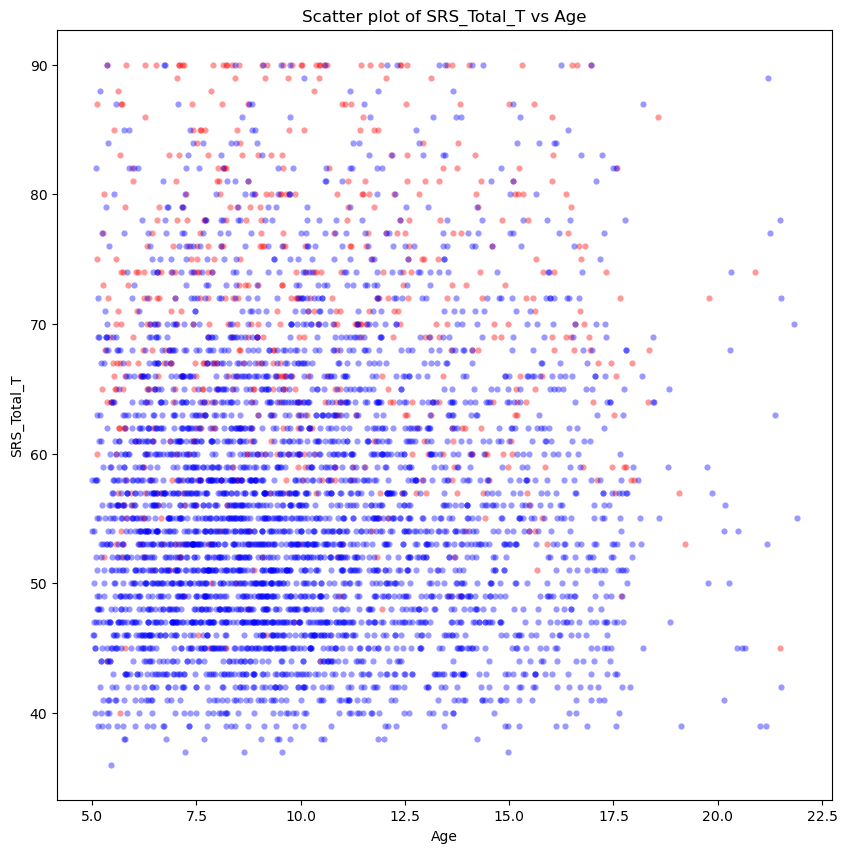

In [59]:
condition = (merged_df['Autism Spectrum Disorder'] == 1)

plt.figure(figsize=(10, 10))

# Plot points with 'Autism Spectrum Disorder' == 1 in red
plt.scatter(merged_df[condition]['Age'], merged_df[condition]['SRS_Total_T'], color='red',s=20,alpha=0.4, linewidths=0)

# Plot points with 'Autism Spectrum Disorder' != 1 in blue
plt.scatter(merged_df[~condition]['Age'], merged_df[~condition]['SRS_Total_T'], color='blue',s=20,alpha=0.4, linewidths=0)

plt.title('Scatter plot of SRS_Total_T vs Age')
plt.xlabel('Age')
plt.ylabel('SRS_Total_T')
plt.show()

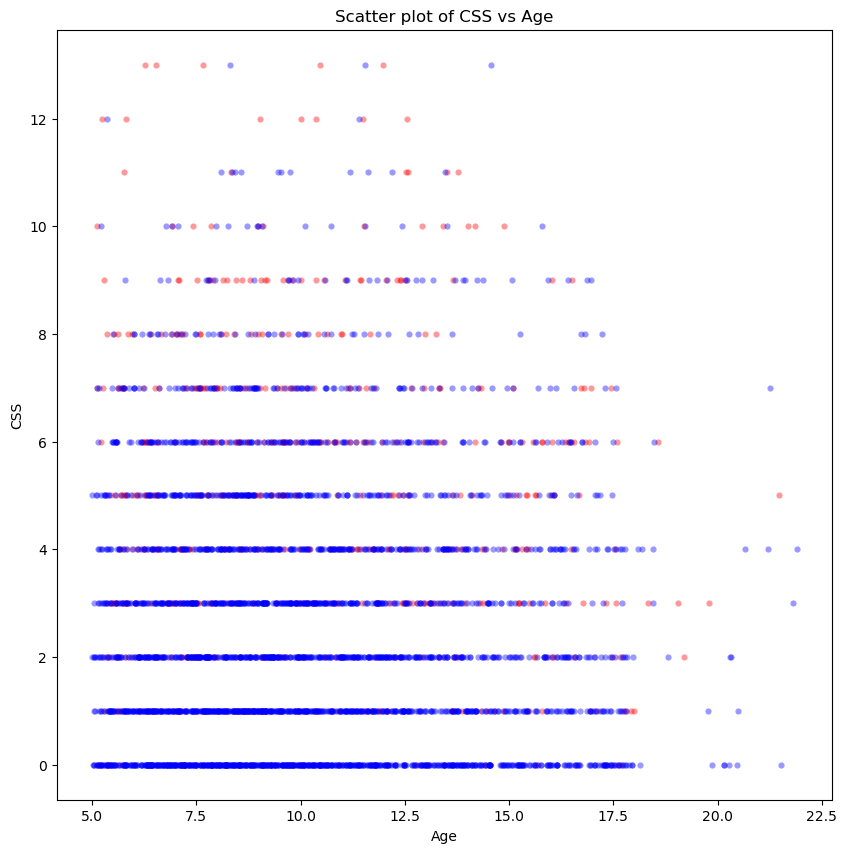

In [77]:
condition = (merged_df['Autism Spectrum Disorder'] == 1)

plt.figure(figsize=(10, 10))

# Plot points with 'Autism Spectrum Disorder' == 1 in red
plt.scatter(merged_df[condition]['Age'], merged_df[condition]['CSS'], color='red',s=20,alpha=0.4, linewidths=0)

# Plot points with 'Autism Spectrum Disorder' != 1 in blue
plt.scatter(merged_df[~condition]['Age'], merged_df[~condition]['CSS'], color='blue',s=20,alpha=0.4, linewidths=0)

plt.title('Scatter plot of CSS vs Age')
plt.xlabel('Age')
plt.ylabel('CSS')
plt.show()

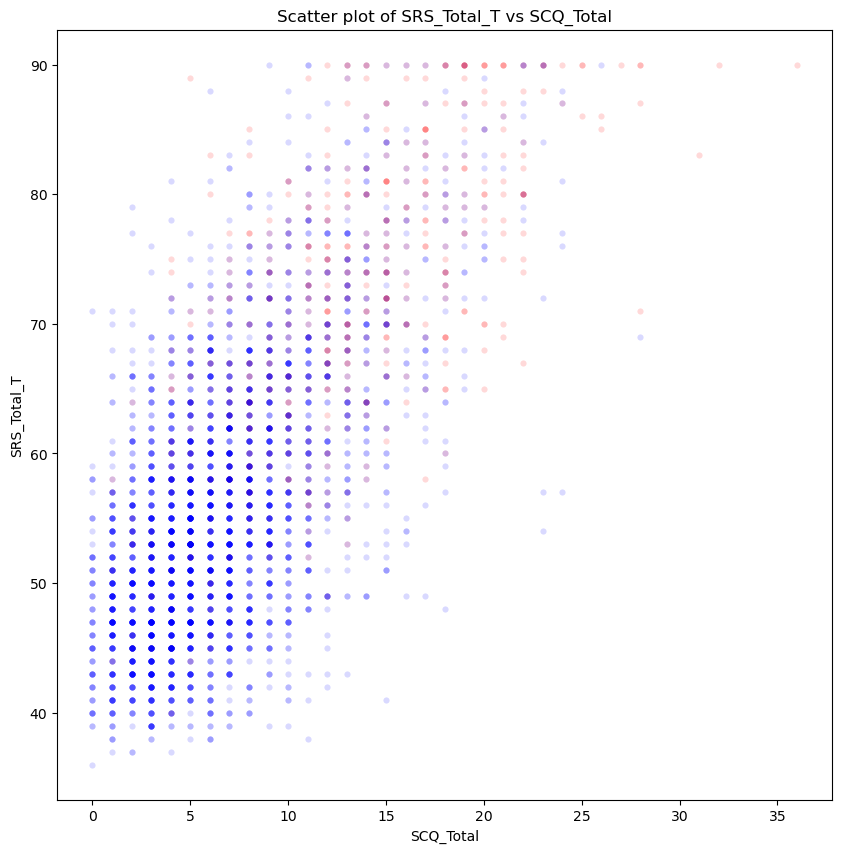

In [78]:
condition = (merged_df['Autism Spectrum Disorder'] == 1)

plt.figure(figsize=(10, 10))

# Plot points with 'Autism Spectrum Disorder' == 1 in red
plt.scatter(merged_df[condition]['SCQ_Total'], merged_df[condition]['SRS_Total_T'], color='red',s=20,alpha=0.15, linewidths=0)

# Plot points with 'Autism Spectrum Disorder' != 1 in blue
plt.scatter(merged_df[~condition]['SCQ_Total'], merged_df[~condition]['SRS_Total_T'], color='blue',s=20,alpha=0.15, linewidths=0)

plt.title('Scatter plot of SRS_Total_T vs SCQ_Total')
plt.xlabel('SCQ_Total')
plt.ylabel('SRS_Total_T')
plt.show()

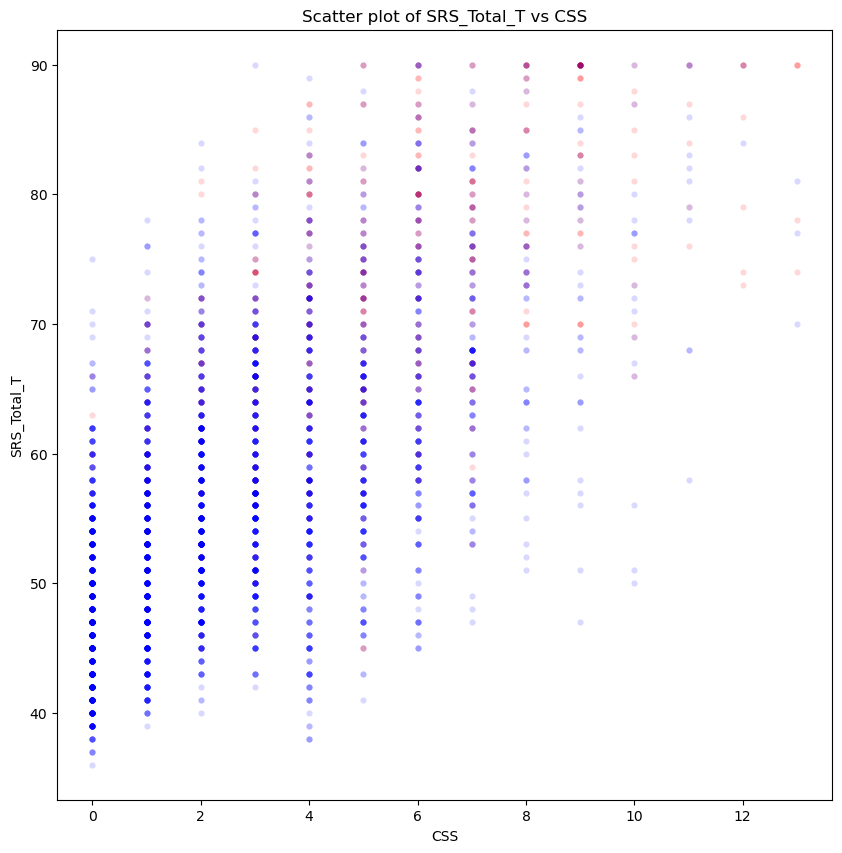

In [80]:
condition = (merged_df['Autism Spectrum Disorder'] == 1)

plt.figure(figsize=(10, 10))

# Plot points with 'Autism Spectrum Disorder' == 1 in red
plt.scatter(merged_df[condition]['CSS'], merged_df[condition]['SRS_Total_T'], color='red',s=20,alpha=0.15, linewidths=0)

# Plot points with 'Autism Spectrum Disorder' != 1 in blue
plt.scatter(merged_df[~condition]['CSS'], merged_df[~condition]['SRS_Total_T'], color='blue',s=20,alpha=0.15, linewidths=0)

plt.title('Scatter plot of SRS_Total_T vs CSS')
plt.xlabel('CSS')
plt.ylabel('SRS_Total_T')
plt.show()

In [73]:
import seaborn as sns


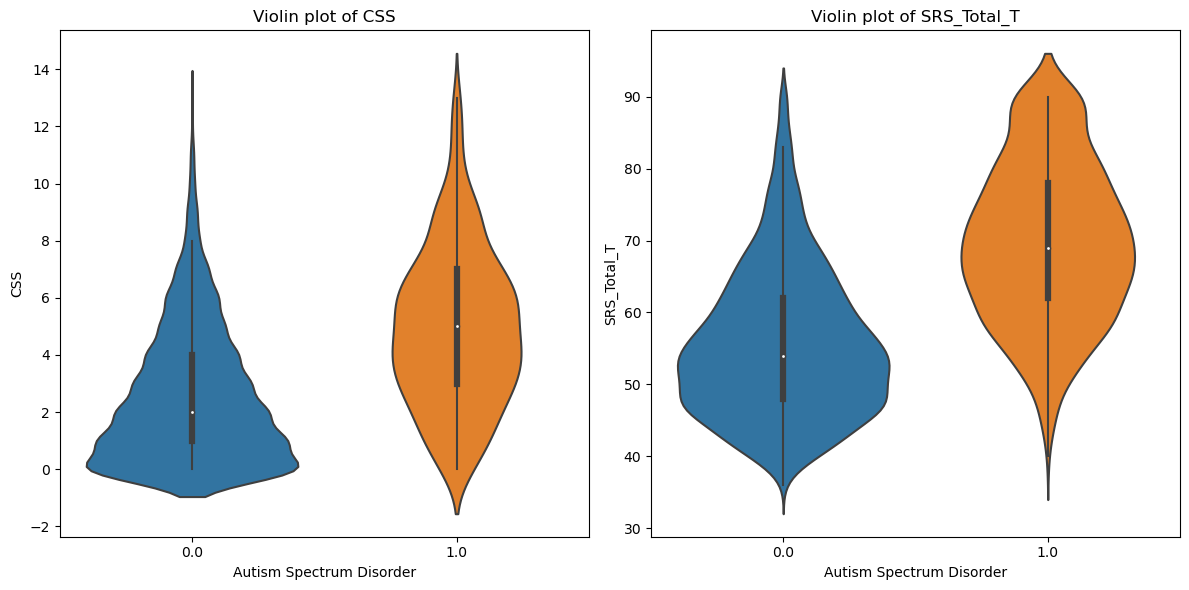

In [74]:
# sns.violinplot(x='Autism Spectrum Disorder', y='CSS', data=merged_df)
# sns.violinplot(x='Autism Spectrum Disorder', y='SRS_Total_T', data=merged_df)


fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.violinplot(x='Autism Spectrum Disorder', y='CSS', data=merged_df, ax=axs[0])
axs[0].set_title('Violin plot of CSS')

sns.violinplot(x='Autism Spectrum Disorder', y='SRS_Total_T', data=merged_df, ax=axs[1])
axs[1].set_title('Violin plot of SRS_Total_T')

plt.tight_layout()
plt.show()

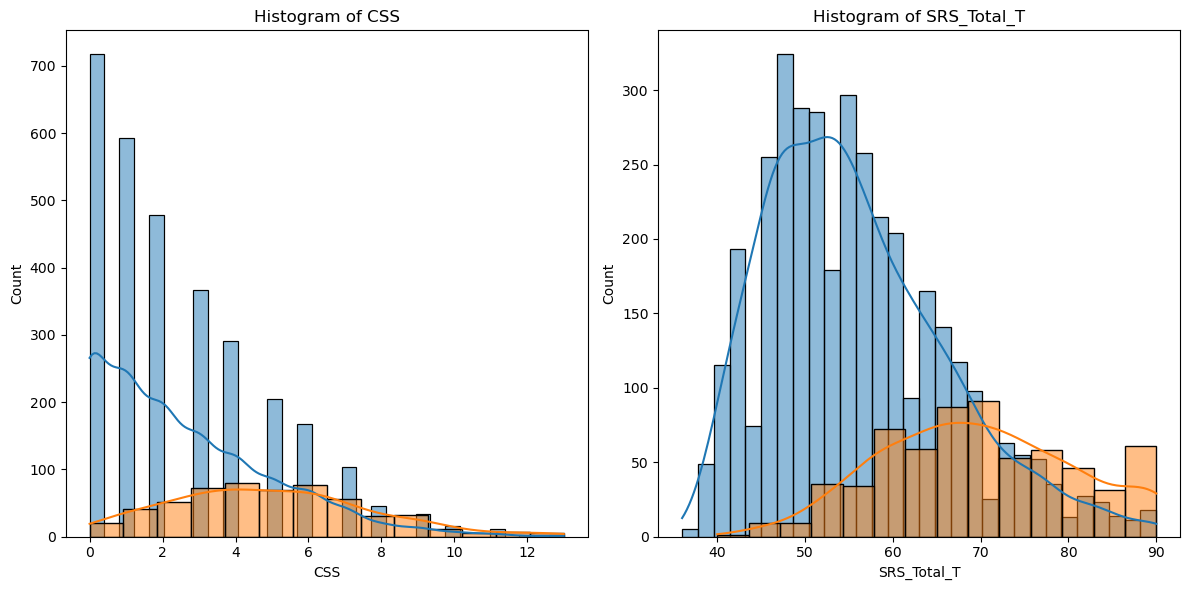

In [76]:
# for category in merged_df['Autism Spectrum Disorder'].unique():
#     sns.histplot(merged_df[merged_df['Autism Spectrum Disorder'] == category]['CSS'], kde=True, label=str(category))



fig, axs = plt.subplots(ncols=2, figsize=(12, 6))


for category in merged_df['Autism Spectrum Disorder'].unique():
    sns.histplot(merged_df[merged_df['Autism Spectrum Disorder'] == category]['CSS'], kde=True, label=str(category),ax=axs[0])
axs[0].set_title('Histogram of CSS')

for category in merged_df['Autism Spectrum Disorder'].unique():
    sns.histplot(merged_df[merged_df['Autism Spectrum Disorder'] == category]['SRS_Total_T'], kde=True, label=str(category), ax=axs[1])
axs[1].set_title('Histogram of SRS_Total_T')

plt.tight_layout()
plt.show()

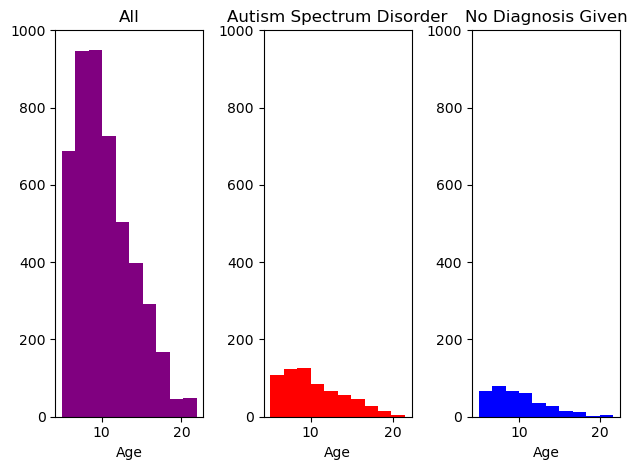

In [101]:
# create a figure with three subplots
fig, axs = plt.subplots(1, 3)

# plot the first subplot with age column for the entire dataframe
#.plot(df['Age'])
axs[0].hist(dx_final['Age'], bins=10, color='purple')
axs[0].set_title('All')
axs[0].set_ylim([0, 1000])
axs[0].set_xlabel('Age')

# plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
axs[1].hist(dx_final[dx_final['Autism Spectrum Disorder'] == 1]['Age'], bins=10, color='red')
axs[1].set_title('Autism Spectrum Disorder')
axs[1].set_ylim([0, 1000])
axs[1].set_xlabel('Age')

# plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
axs[2].hist(dx_final[dx_final['No Diagnosis Given'] == 1]['Age'], bins=10, color='blue')
axs[2].set_title('No Diagnosis Given')
axs[2].set_ylim([0, 1000])
axs[2].set_xlabel('Age')

# adjust the layout of subplots
plt.tight_layout()

# show the plot
plt.show()

In [ ]:
# create a figure with three subplots
fig, axs = plt.subplots(1, 3)

# plot the first subplot with age column for the entire dataframe
#.plot(df['Age'])
axs[0].hist(dx_final['Age'], bins=10, color='purple')
axs[0].set_title('All')
axs[0].set_ylim([0, 1000])
axs[0].set_xlabel('Age')

# plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
axs[1].hist(dx_final[dx_final['Autism Spectrum Disorder'] == 1]['Age'], bins=10, color='red')
axs[1].set_title('Autism Spectrum Disorder')
axs[1].set_ylim([0, 1000])
axs[1].set_xlabel('Age')

# plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
axs[2].hist(dx_final[dx_final['No Diagnosis Given'] == 1]['Age'], bins=10, color='blue')
axs[2].set_title('No Diagnosis Given')
axs[2].set_ylim([0, 1000])
axs[2].set_xlabel('Age')

# adjust the layout of subplots
plt.tight_layout()

# show the plot
plt.show()

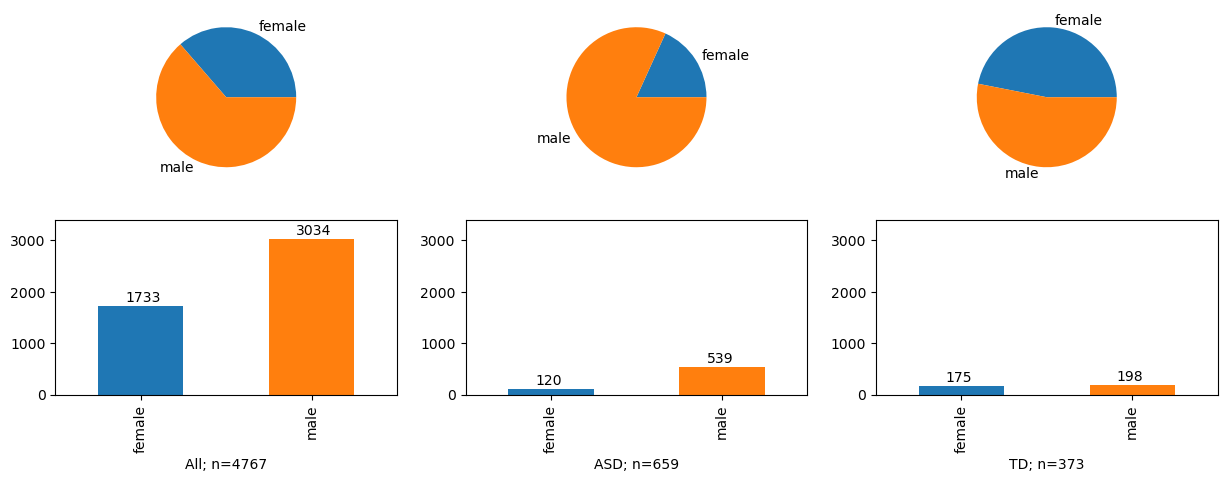

In [170]:

fig, axs = plt.subplots(2, 3, figsize=(15, 5))

dx_final.groupby('Sex').size().plot(kind='pie', ax=axs[0,0])
dx_final.groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All; n={dx_final.shape[0]}')
for i in axs[1,0].patches:
    axs[1,0].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

dx_asd=dx_final[dx_final['Autism Spectrum Disorder'] == 1]
dx_asd.groupby('Sex').size().plot(kind='pie', ax=axs[0,1])
dx_asd.groupby('Sex').size().plot(kind='bar', ax=axs[1,1], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'ASD; n={dx_asd.shape[0]}')
for i in axs[1,1].patches:
    axs[1,1].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)
dx_td=dx_final[dx_final['No Diagnosis Given'] == 1]
dx_td.groupby('Sex').size().plot(kind='pie', ax=axs[0,2])
dx_td.groupby('Sex').size().plot(kind='bar', ax=axs[1,2], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'TD; n={dx_td.shape[0]}')
for i in axs[1,2].patches:
    axs[1,2].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

plt.show()

In [152]:
dx_final[dx_final['Autism Spectrum Disorder'] == 1].shape[0]

659

In [9]:
dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == 1)]


,Identifiers,Age,Sex,Site,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,...,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Feeding or Eating Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder
9,NDARAA947ZG5,13.627880,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,NDARAC850DCN,7.070385,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,NDARAD232HVV,12.942961,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,NDARAD615WLJ,6.304243,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,NDARAE301XTM,16.515970,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,NDARVG148WHV,10.835158,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4646,NDARVY564LFB,16.685603,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4722,NDARYL268BVG,12.231462,male,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4723,NDARYL438DCK,12.765571,male,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


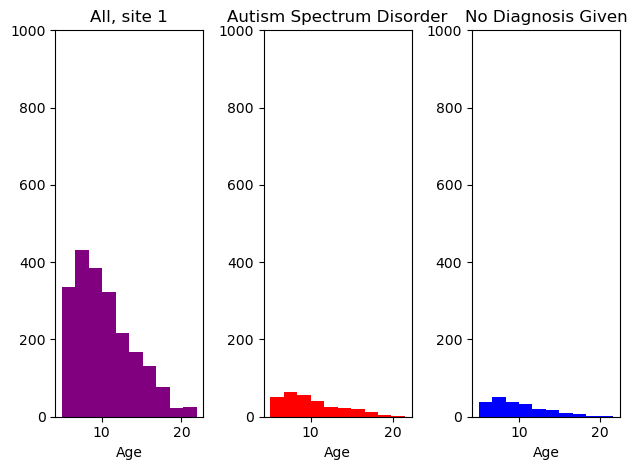

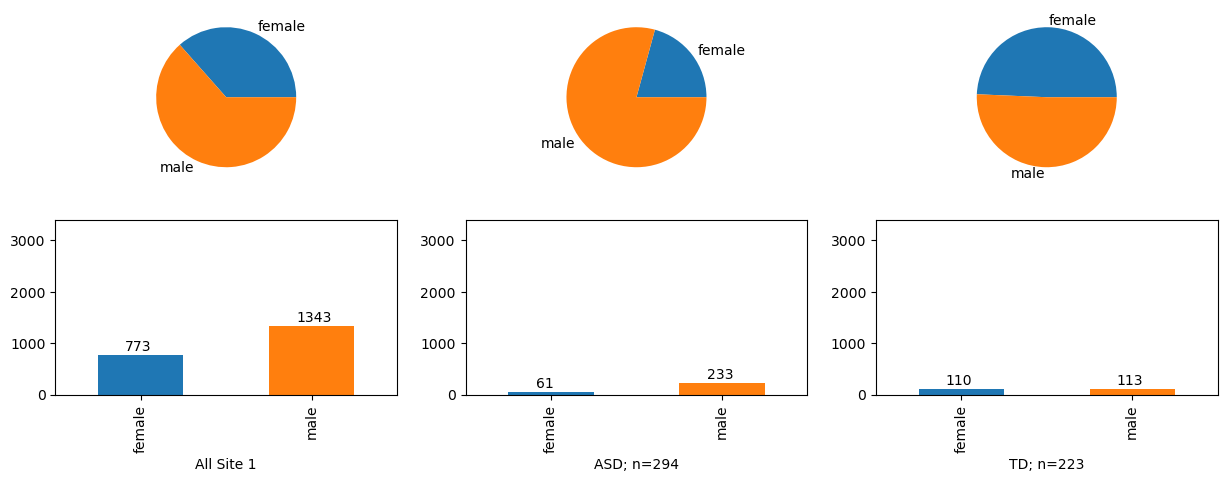

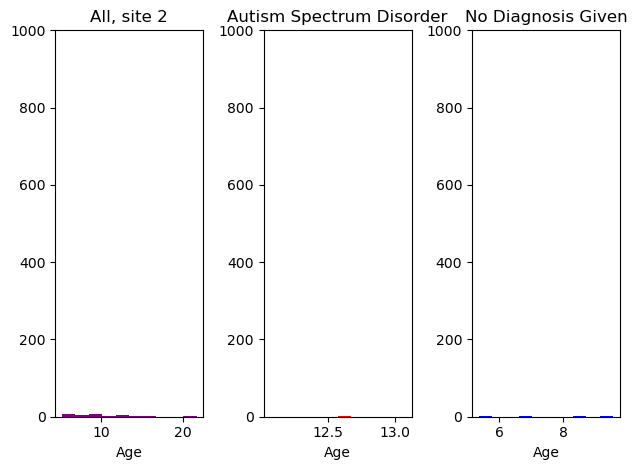

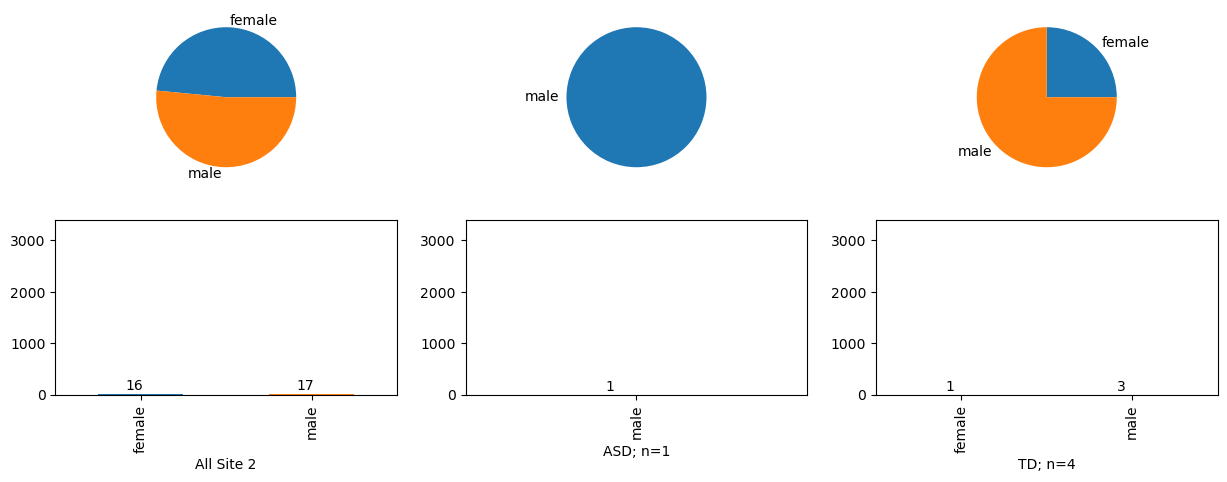

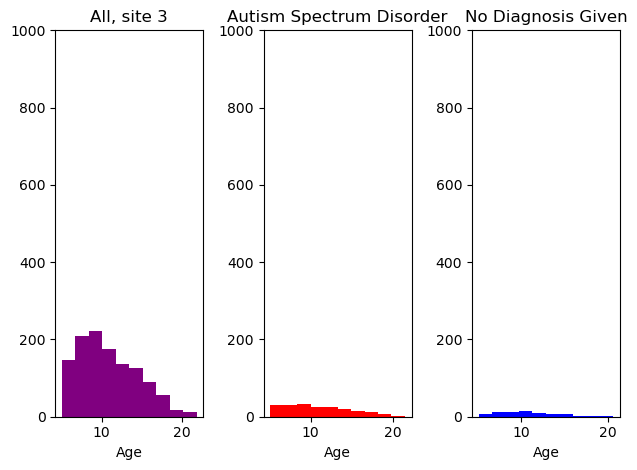

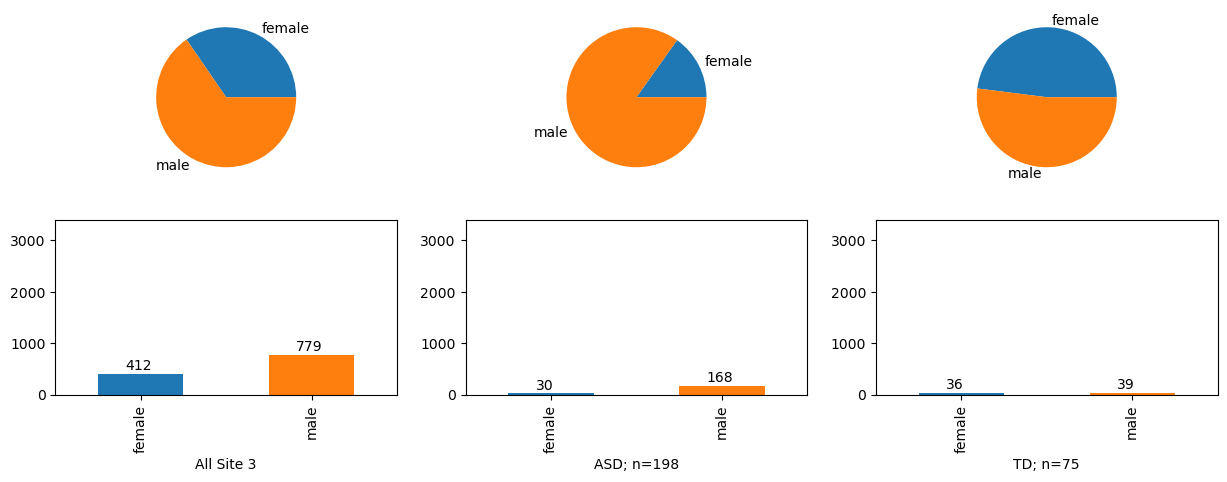

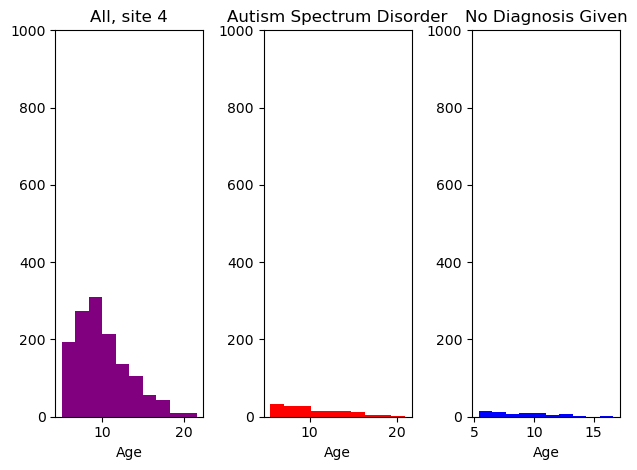

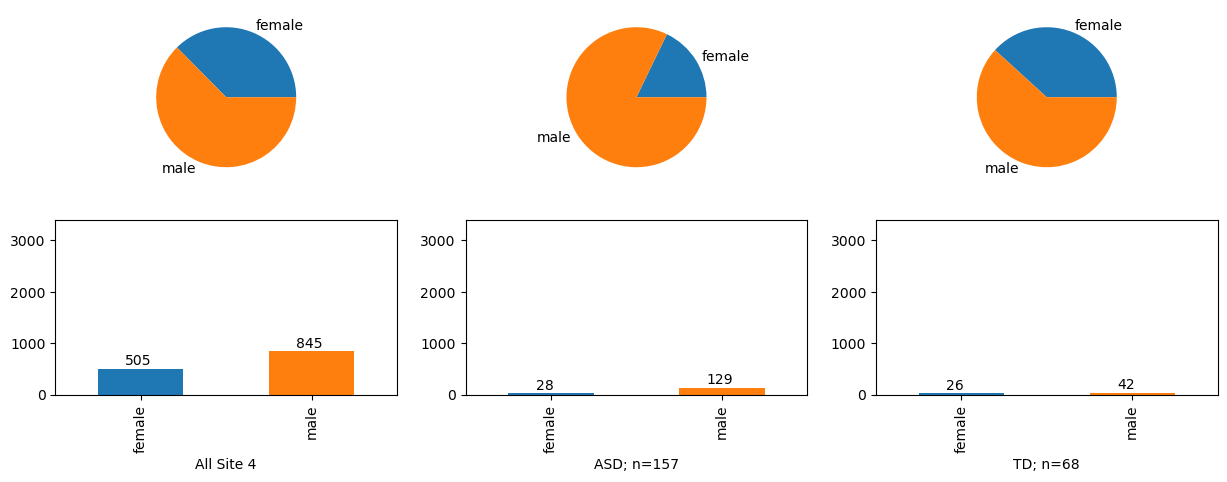

In [20]:
for site in np.arange(1,5):
    fig, axs = plt.subplots(1, 3)

    # plot the first subplot with age column for the entire dataframe
    #.plot(df['Age'])
    axs[0].hist(dx_final[(dx_final['Site'] == site)]['Age'], bins=10, color='purple')
    axs[0].set_title(f'All, site {site}')
    axs[0].set_ylim([0, 1000])
    axs[0].set_xlabel('Age')

    # plot the second subplot with age column for rows where Autism Spectrum Disorder is equal to 1
    axs[1].hist(dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == site)]['Age'], bins=10, color='red')
    axs[1].set_title('Autism Spectrum Disorder')
    axs[1].set_ylim([0, 1000])
    axs[1].set_xlabel('Age')

    # plot the third subplot with age column for rows where No Diagnosis Given is equal to 1
    axs[2].hist(dx_final[(dx_final['No Diagnosis Given'] == 1) & (dx_final['Site'] == site)]['Age'], bins=10, color='blue')
    axs[2].set_title('No Diagnosis Given')
    axs[2].set_ylim([0, 1000])
    axs[2].set_xlabel('Age')

    # adjust the layout of subplots
    plt.tight_layout()

    # show the plot
    plt.show()




    fig, axs = plt.subplots(2, 3, figsize=(15, 5))

    dx_final[dx_final['Site'] == site].groupby('Sex').size().plot(kind='pie', ax=axs[0,0])

    #dx_final.groupby('Sex').size().plot(kind='pie', ax=axs[0,0])
    dx_final[(dx_final['Site'] == site)].groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All Site {site}')
    #dx_final.groupby('Sex').size().plot(kind='bar', ax=axs[1,0], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'All; n={dx_final.shape[0]}')
    for i in axs[1,0].patches:
        axs[1,0].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

    dx_asd=dx_final[(dx_final['Autism Spectrum Disorder'] == 1) & (dx_final['Site'] == site)]
    dx_asd.groupby('Sex').size().plot(kind='pie', ax=axs[0,1])
    dx_asd.groupby('Sex').size().plot(kind='bar', ax=axs[1,1], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'ASD; n={dx_asd.shape[0]}')
    for i in axs[1,1].patches:
        axs[1,1].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)
    dx_td=dx_final[(dx_final['No Diagnosis Given'] == 1) & (dx_final['Site'] == site)]
    dx_td.groupby('Sex').size().plot(kind='pie', ax=axs[0,2])
    dx_td.groupby('Sex').size().plot(kind='bar', ax=axs[1,2], color=['C0', 'C1'], ylim=[0,3400],xlabel=f'TD; n={dx_td.shape[0]}')
    for i in axs[1,2].patches:
        axs[1,2].text(i.get_x()+0.16, i.get_height()+75, str(i.get_height()), fontsize=10)

    plt.show()